# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [19]:


def apply_svd_custom(X_train, X_test, n_components):
    """
    Custom SVD implementation using eigenvalue decomposition for dimensionality reduction.

    Args:
    - X_train: Training data (numpy array)
    - X_test: Test data (numpy array)
    - n_components: Number of components for dimensionality reduction.

    Returns:
    - X_train_svd: Reduced training data
    - X_test_svd: Reduced test data
    - top_eigenvectors: The top n eigenvectors used for reduction (principal components)
    """
    # Step 1: Compute covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train)

    # Step 2: Perform eigenvalue decomposition on covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 3: Take only the real part of eigenvalues and eigenvectors
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top `n_components` eigenvectors
    top_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Step 6: Project the training and test data onto the new basis
    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)

    return X_train_svd, X_test_svd, top_eigenvectors



## Part 3: Train Logistic Regression and Measure Performance

In [20]:
def train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test):
    """
    Train logistic regression and measure training time.

    Args:
    - X_train_svd: SVD-reduced training data
    - y_train: Training labels
    - X_test_svd: SVD-reduced test data
    - y_test: Test labels

    Returns:
    - accuracy: Accuracy of the logistic regression model
    - training_time: Time taken to train the model
    """
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train_svd, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test_svd)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [21]:
# SVD Components to try
svd_components = [300, 120, 90, 50, 10]
results = []

# Run SVD for different component numbers
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply custom SVD
    X_train_svd, X_test_svd, top_eigenvectors = apply_svd_custom(X_train, X_test, n_components)

    # Train logistic regression
    start_time = time.time()
    accuracy, _ = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    training_time = time.time() - start_time

    # Store the results
    results.append({
        'SVD Components': n_components,
        'Accuracy': accuracy,
        'Training Time': training_time,
        'Eigenvectors': top_eigenvectors  # Store eigenvectors for later visualization
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")




Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 253.4538 seconds
Applying custom SVD with 120 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 120, Accuracy: 0.9184, Training time: 79.9129 seconds
Applying custom SVD with 90 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 90, Accuracy: 0.9186, Training time: 54.3339 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 15.7346 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.3158 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


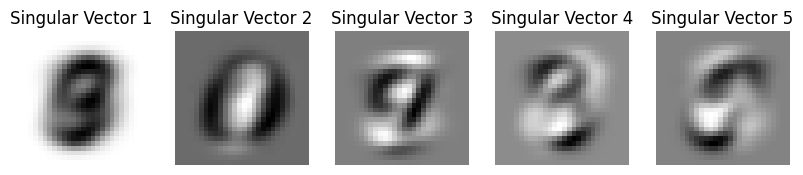

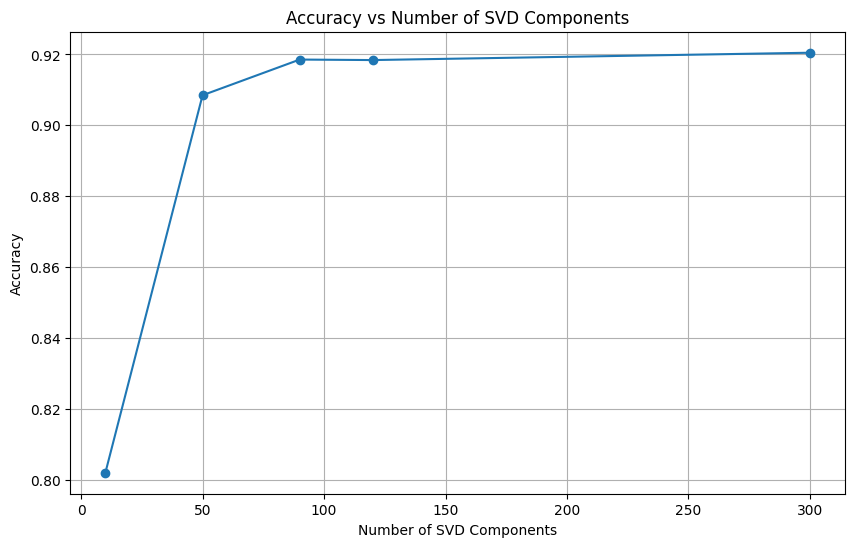

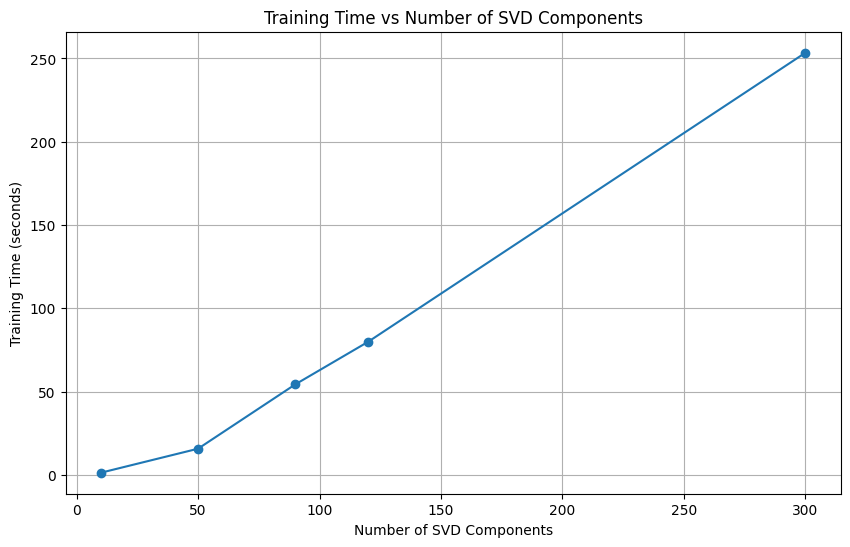

In [22]:
# Visualize top 5 singular vectors for the first SVD run (for example, 300 components)
top_eigenvectors = results[0]['Eigenvectors']  # First run, adjust based on which you want to visualize
n_singular_vectors = 5  # Visualizing top 5

plt.figure(figsize=(10, 5))
for i in range(n_singular_vectors):
    singular_vector = top_eigenvectors[:, i].reshape(28, 28)  # Adjust the shape based on your data
    plt.subplot(1, n_singular_vectors, i + 1)
    plt.imshow(singular_vector, cmap='gray')
    plt.title(f'Singular Vector {i + 1}')
    plt.axis('off')
plt.show()

# Extract data for plotting
components = [res['SVD Components'] for res in results]
accuracies = [res['Accuracy'] for res in results]
training_times = [res['Training Time'] for res in results]

# Plot Accuracy vs Components
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', label="Accuracy")
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')
plt.grid(True)
plt.show()

# Plot Training Time vs Components
plt.figure(figsize=(10, 6))
plt.plot(components, training_times, marker='o', label="Training Time")
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.grid(True)
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [23]:
""" The plots reveal a clear trade-off between accuracy and training time as the number of SVD components increases. The accuracy improves significantly when the number of components rises from 10 to 50, reaching a plateau around 90 components. Meanwhile, training time grows almost linearly with the number of components, showing a substantial increase as more components are used, particularly from 120 to 300. This suggests that while higher components slightly improve accuracy, they come at a significant cost in training time, with diminishing returns beyond 90 components."""

' The plots reveal a clear trade-off between accuracy and training time as the number of SVD components increases. The accuracy improves significantly when the number of components rises from 10 to 50, reaching a plateau around 90 components. Meanwhile, training time grows almost linearly with the number of components, showing a substantial increase as more components are used, particularly from 120 to 300. This suggests that while higher components slightly improve accuracy, they come at a significant cost in training time, with diminishing returns beyond 90 components.'